In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("student-scores.csv")

In [13]:
df

,Actual,Predicted
405,79,82.119571
1190,50,87.037786
1132,86,83.349125
731,72,75.971803
1754,95,84.578679
...,...,...
638,78,75.971803
360,91,85.808233
1810,90,85.808233
1743,84,88.267340


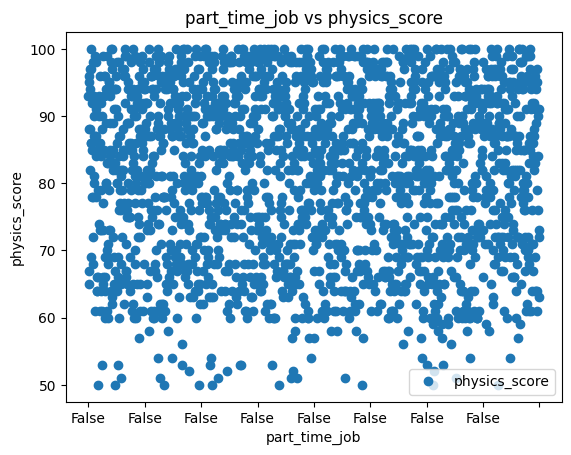

In [4]:
df.plot(x='part_time_job', y='physics_score', style='o')
plt.title('part_time_job vs physics_score')
plt.xlabel('part_time_job')
plt.ylabel('physics_score')
plt.show()


In [10]:
df

,Actual,Predicted
405,79,82.119571
1190,50,87.037786
1132,86,83.349125
731,72,75.971803
1754,95,84.578679
...,...,...
638,78,75.971803
360,91,85.808233
1810,90,85.808233
1743,84,88.267340


In [5]:
df["extracurricular_activities"] = df["extracurricular_activities"].map({False: 0, True:1})


In [6]:
x = df[['absence_days','extracurricular_activities']].values.reshape(-1,2)
y = df['math_score']


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()


,Actual,Predicted
405,79,82.119571
1190,50,87.037786
1132,86,83.349125
731,72,75.971803
1754,95,84.578679


In [12]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 156.47871604612396


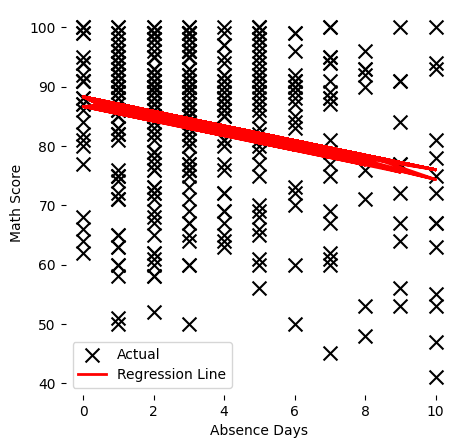

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X_test[:, 0], y_test, color='black', marker='x', s=100, label='Actual')
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Absence Days')
plt.ylabel('Math Score')
plt.legend()
plt.grid(False)
plt.box(False)
plt.show()
